# Plot figures from results files

## Import packages and configure plots

In [1]:
from __future__ import division
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LightSource
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from fatiando import gridder
from fatiando.constants import MEAN_EARTH_RADIUS

In [2]:
%matplotlib inline
plt.rcParams['axes.labelsize'] = 9.0 # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 9.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.usetex'] = True # use latex for all text handling
plt.rcParams['text.color'] = '3a3a3a'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = '3a3a3a'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2

## Speed comparison

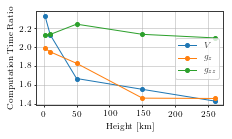

In [3]:
with open('results/speed-comparison/times_homogeneous.pkl', 'r') as outfile:
    times_homogeneous = pickle.load(outfile)

with open('results/speed-comparison/times_variable.pkl', 'r') as outfile:
    times_variable = pickle.load(outfile)

fields = 'potential gz gzz'.split()
fig, ax = plt.subplots()
fig.set_size_inches((3.33, 2))
labels = r'$V$ $g_z$ $g_{zz}$'.split()

for field, label in zip(fields, labels):
    heights = times_homogeneous['heights']
    ratio = times_variable[field]/times_homogeneous[field]
    ax.plot(heights/1000, ratio, 'o-', label=label)
    ax.grid(True, linewidth=0.5, color='#aeaeae')

ax.set_ylabel("Computation Time Ratio")
ax.set_xlabel('Height [km]')    
plt.legend()
plt.tight_layout()
plt.savefig('../manuscript/figures/speed-comparison.pdf')
plt.show()

## Tesseroid vs Spherical Shell with Linear Density

### Thin Shell (1km)

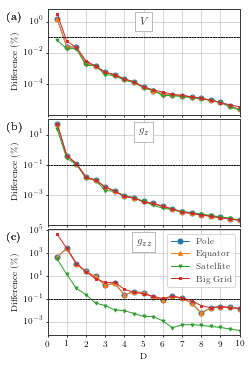

In [4]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['C' + str(i) for i in range(4)]
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dlinear/' + field + '-' + grid + '-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([0, 10], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dlinear-thin-differences.pdf')
plt.show()

### Thick Shell (35km)

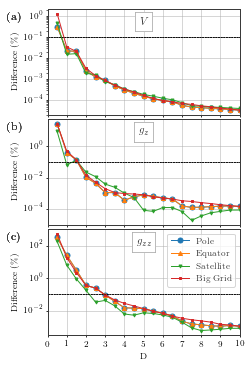

In [5]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['C' + str(i) for i in range(4)]
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dlinear/' + field + '-' + grid + '-thick-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([0, 10], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dlinear-thick-differences.pdf')
plt.show()

## Tesseroid vs Spherical Shell with Exponential Density

### Thin Shell (1km)

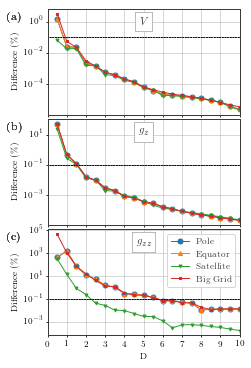

In [6]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['C' + str(i) for i in range(4)]
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dexp-shifted/' + field + '-' + grid + '-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dexp-shifted-thin-differences.pdf')
plt.show()

### Thick Shell (35km)

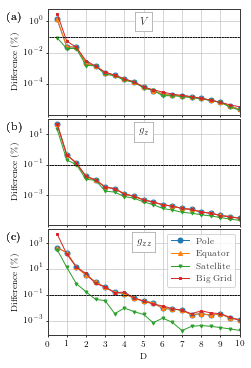

In [7]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['C' + str(i) for i in range(4)]
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dexp-shifted/' + field + '-' + grid + '-thick-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dexp-shifted-thick-differences.pdf')
plt.show()

### D vs the constant b in the power

#### Thin Shell

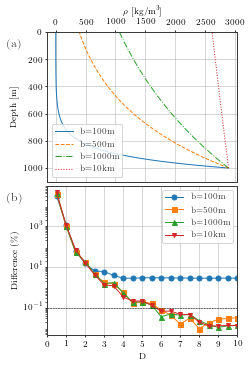

In [8]:
b_values = [1e2, 5*1e2, 1e3, 1e4, 1e5]
markers = ["o", "s", "^", "v", "D"]
msize = [5, 5, 5, 4, 3, 2]
labels = [r"b=100m", r"b=500m",
          r"b=1000m", r"b=10km",
          r"b=100km"]
linestyles = ["-", "--", "-.", ":"]
field = 'gzz'
deltah = MEAN_EARTH_RADIUS
bottom = -1000.
max_density = 2900.
heights = np.linspace(-1000, 0, 101)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((3.33, 5))

for b, m, ms, linestyle, label in zip(b_values, markers,
                                      msize, linestyles, labels):    
    
    def density_exp_shifted(height):
        a = max_density*np.exp(bottom/b)
        r = height + MEAN_EARTH_RADIUS
        return a*np.exp(-(r - deltah)/b)

    ax1.plot(density_exp_shifted(heights), -heights,
             linestyle=linestyle, label=label)
    
    diffs = np.load('results/Dexp-vs-power/' + field + '-' +
                    '{:.1e}'.format(b) + '-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax2.plot(D_values, diff, '-', marker=m,
            markersize=ms, label=label)

ax1.legend()
ax1.grid(True, linewidth=0.5, color='#aeaeae')
ax1.set_xlabel(r"$\rho$ [kg/m$^3$]")
ax1.set_ylabel("Depth [m]")
ax1.set_ylim(0, 1100)
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(-0.21, 0.9, "(a)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax1.transAxes)

ax2.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax2.set_yscale('log')
ax2.set_yticks(ax2.get_yticks()[2:-2])
ax2.set_ylabel('Difference (\%)')
ax2.grid(True, linewidth=0.5, color='#aeaeae')
ax2.set_axisbelow(True)
ax2.set_xlabel(r"D")
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.legend(loc=1)
ax2.text(-0.21, 0.9, "(b)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax2.transAxes)

plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dexp-power-differences-thin.pdf')
plt.show()

#### Thick Shell

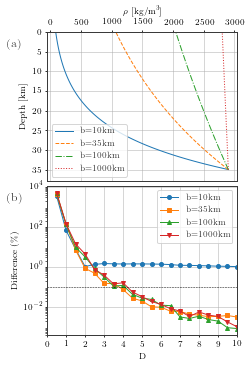

In [9]:
b_values = [1e4, 35e3, 1e5, 1e6]
markers = ["o", "s", "^", "v", "D", "8"]
msize = [4,4, 4,4]
labels = [r"b=10km", r"b=35km",
          r"b=100km", r"b=1000km"]
linestyles = ["-", "--", "-.", ":"]
field = 'gzz'
deltah = MEAN_EARTH_RADIUS
bottom = -35000.
max_density = 2900.
heights = np.linspace(-35000, 0, 101)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((3.33, 5))

for b, m, ms, linestyle, label in zip(b_values, markers,
                                      msize, linestyles, labels):    
    
    def density_exp_shifted(height):
        a = max_density*np.exp(bottom/b)
        r = height + MEAN_EARTH_RADIUS
        return a*np.exp(-(r - deltah)/b)

    ax1.plot(density_exp_shifted(heights), -heights/1000.,
             linestyle=linestyle, label=label)
    
    diffs = np.load('results/Dexp-vs-power/' + field + '-' +
                    '{:.1e}'.format(b) + '-thick-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax2.plot(D_values, diff, '-', marker=m,
            markersize=ms, label=label)

ax1.legend()
ax1.grid(True, linewidth=0.5, color='#aeaeae')
ax1.set_xlabel(r"$\rho$ [kg/m$^3$]")
ax1.set_ylabel("Depth [km]")
ax1.set_ylim(0, 38)
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(-0.21, 0.9, "(a)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax1.transAxes)

ax2.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax2.set_yscale('log')
ax2.set_yticks(ax2.get_yticks()[2:-2])
ax2.set_ylabel('Difference (\%)')
ax2.grid(True, linewidth=0.5, color='#aeaeae')
ax2.set_axisbelow(True)
ax2.set_xlabel(r"D")
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.legend(loc=1)
ax2.text(-0.21, 0.9, "(b)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax2.transAxes)

plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dexp-power-differences-thick.pdf')
plt.show()

## Density-based discretization on extreme exponential density variation

### Thin Shell

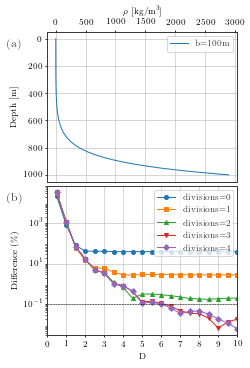

In [10]:
divisions = range(5)
markers = ["o", "s", "^", "v", "D"]
labels = ["divisions=" + str(d) for d in divisions]
field = 'gzz'
b = 1e2
max_density = 2900.
deltah = MEAN_EARTH_RADIUS
bottom = -1000.
heights = np.linspace(-1000, 0, 101)

def density_exp_shifted(height):
    a = max_density*np.exp(bottom/b)
    r = height + MEAN_EARTH_RADIUS
    return a*np.exp(-(r - deltah)/b)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((3.33, 5))

ax1.plot(density_exp_shifted(heights), -heights,
         '-', label="b=100m")

for d, m, label in zip(divisions, markers, labels):

    diffs = np.load('results/Dexp-vs-divisions/' + field + '-' +
                    '{0}'.format(d) + '-thin-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax2.plot(D_values, diff, '-', marker=m,
             label=label)

ax1.legend()
ax1.grid(True, linewidth=0.5, color='#aeaeae')
ax1.set_xlabel(r"$\rho$ [kg/m$^3$]")
ax1.set_ylabel("Depth [m]")
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(-0.21, 0.9, "(a)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax1.transAxes)

ax2.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax2.set_yscale('log')
ax2.set_yticks(ax2.get_yticks()[2:-2])
ax2.set_ylabel('Difference (\%)')
ax2.grid(True, linewidth=0.5, color='#aeaeae')
ax2.set_axisbelow(True)
ax2.set_xlabel(r"D")
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.legend(loc=1)
ax2.text(-0.21, 0.9, "(b)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax2.transAxes)

plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dexp-density-divisions-thin.pdf')
plt.show()

### Thick Shell

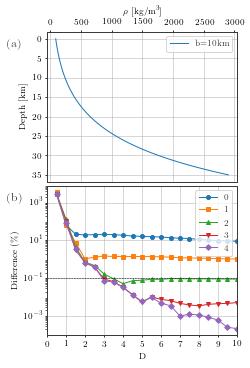

In [11]:
divisions = range(5)
markers = ["o", "s", "^", "v", "D"]
labels = [str(d) for d in divisions]
field = 'gzz'
b = 1e4
max_density = 2900.
deltah = MEAN_EARTH_RADIUS
bottom = -35000.
heights = np.linspace(-35000, 0, 101)

def density_exp_shifted(height):
    a = max_density*np.exp(bottom/b)
    r = height + MEAN_EARTH_RADIUS
    return a*np.exp(-(r - deltah)/b)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((3.33, 5))

ax1.plot(density_exp_shifted(heights), -1e-3*heights,
         '-', label="b=10km")

for d, m, label in zip(divisions, markers, labels):

    diffs = np.load('results/Dexp-vs-divisions/' + field + '-' +
                    '{0}'.format(d) + '-thick-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax2.plot(D_values, diff, '-', marker=m,
             label=label)

ax1.legend()
ax1.grid(True, linewidth=0.5, color='#aeaeae')
ax1.set_xlabel(r"$\rho$ [kg/m$^3$]")
ax1.set_ylabel("Depth [km]")
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(-0.21, 0.9, "(a)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax1.transAxes)

ax2.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax2.set_yscale('log')
ax2.set_yticks(ax2.get_yticks()[2:-2])
ax2.set_ylabel('Difference (\%)')
ax2.grid(True, linewidth=0.5, color='#aeaeae')
ax2.set_axisbelow(True)
ax2.set_xlabel(r"D")
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.legend(loc=1)
ax2.text(-0.21, 0.9, "(b)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax2.transAxes)

plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Dexp-density-divisions-thick.pdf')
plt.show()

## Tesseroid with discontinuous density

### Symmetrical density function

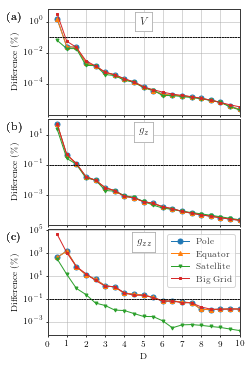

In [12]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['C' + str(i) for i in range(4)]
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Ddiscontinuous/' + field + '-' + grid + '-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Ddiscontinuous-symmetric-differences.pdf')
plt.show()

### Asymmetrical density function

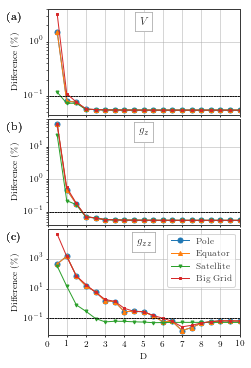

In [13]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['C' + str(i) for i in range(4)]
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Ddiscontinuous/' + field + '-' + grid + '-asym-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../manuscript/figures/Ddiscontinuous-asymmetric-differences.pdf')
plt.show()

## Nequen Basin

### Load Data: Topography and Sediment Thickness

In [14]:
data = np.load("../data/topography.npy")
lat, lon, topo = data[:, 0], data[:, 1], data[:, 2]
shape = (571, 457)
area = (lat.min(), lat.max(), lon.min(), lon.max())

topography = {'lon': lon, 'lat': lat, 'topo': topo,
              'shape': shape, 'area': area}

lat, lon, thickness = np.loadtxt('../data/sediment_thickness.dat',
                                 unpack=True)
shape = (117, 91)
area = (lat.min(), lat.max(), lon.min(), lon.max())
sediments = {'lon': lon, 'lat':lat, 'thickness': thickness,
             'shape': shape, 'area': area}

### Load Data: Computed Fields

In [15]:
fields = 'potential gx gy gz gxy gzz'.split()
shape = (159, 163)
area = (-40.9, -33., 286.9, 295.)
lat, lon, height = gridder.regular(area, shape, z=260e3)

variable, homogeneous = [], []
for field in fields:
    filename = "results/neuquen-basin/homogeneous/" + field + ".npy"
    homogeneous.append(np.load(filename))
    filename = "results/neuquen-basin/variable/" + field + ".npy"
    variable.append(np.load(filename))

results = {'lat': lat, 'lon': lon, 'height': height,
           'shape': shape, 'area': area,
           'variable': variable, 'homogeneous': homogeneous}

### Create Basemap and configuration of draws

In [16]:
area = topography['area']

bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='i')

config = {'countries': dict(linewidth=0.5, color='k'),
          'states': dict(linewidth=0.4, linestyle='--', color='k'),
          'coastlines': dict(linewidth=0.5, color='k'),
          'meridians': dict(meridians=np.arange(-80, -50, 2),
                            linewidth=0.5,
                            labels=[False, False, True, False],
                            labelstyle='+/-'),
          'parallels': dict(circles=np.arange(-50, -30, 2),
                            linewidth=0.5,
                            labels=[True, False, False, False],
                            labelstyle='+/-')}

config['parallels-quiet'] = config['parallels'].copy()
config['parallels-quiet']['labels'] = [False, False, False, False]

config['meridians-quiet'] = config['meridians'].copy()
config['meridians-quiet']['labels'] = [False, False, False, False]

config['parallels-right'] = config['parallels'].copy()
config['parallels-right']['labels'] = [False, True, False, False]

### Plot

/home/santi/.anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/home/santi/.anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/santi/.anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/santi/.anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/santi/.anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was depre

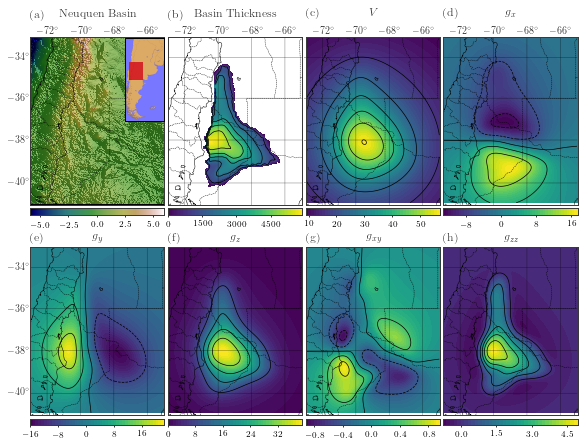

In [17]:
fig = plt.figure(figsize=(8, 6.08))

grid = AxesGrid(fig, [0.04, 0, 0.95, 0.97],
                nrows_ncols=(2, 4), axes_pad=(0.05, 0.45),
                cbar_location="bottom", cbar_mode="each",
                cbar_size="4%", cbar_pad=0.05)

# --------------
# Topography Map
# --------------
ax, bm.ax, cbax = grid[0], grid[0], grid.cbar_axes[0]
ax.set_title("Neuquen Basin", y=1.08, loc="center")
ax.set_title("(a)", y=1.08, loc="left")
x, y = bm(topography['lon'], topography['lat'])
shape = topography['shape']
vmax = np.abs([np.nanmin(topography['topo']),
               np.nanmax(topography['topo'])]).max()
vmin = -vmax
cmap = plt.cm.gist_earth

# Hillshaded topography
ls = LightSource(azdeg=120)
rgb = ls.shade(topography['topo'].reshape(shape),
               cmap, blend_mode='soft', vert_exag=1000,
               vmin=vmin, vmax=vmax)
bm.imshow(rgb)

# Proxy image for colorbar
im = bm.imshow(1e-3*topography['topo'].reshape(shape), cmap=cmap)
im.remove()
cbar = cbax.colorbar(im)

# Basemap configuration
bm.drawcountries(**config['countries'])
bm.drawstates(**config['states'])
bm.drawcoastlines(**config['coastlines'])
l = bm.drawmeridians(**config['meridians'])
for element in l.keys():
    lines, texts = l[element]
    for line in lines:
        line.remove() # remove meridians lines
l = bm.drawparallels(**config['parallels'])
for element in l.keys():
    lines, texts = l[element]
    for line in lines:
        line.remove() # remove parallels lines

# Location map
height, width = "50%", "29.375%"
axins = inset_axes(ax,
                   width=width,
                   height=height,
                   loc=1,
                   borderpad=0)
bm2 = Basemap(projection='merc',
               llcrnrlon=360 - 75, llcrnrlat=-56,
               urcrnrlon=360 - 53, urcrnrlat=-21,
               resolution='i', ax=axins)
bm2.drawmapboundary(fill_color='#7777ff')
bm2.fillcontinents(color='#ddaa66', lake_color='#7777ff')
bm2.drawcountries(linewidth=0.02)
bm2.drawcoastlines(linewidth=0.02)
x1, y1 = bm2(area[2], area[0])
x2, y2 = bm2(area[3], area[1])
rectangle = Rectangle((x1, y1),
                      abs(x2 - x1),
                      abs(y2 - y1),
                      facecolor='C3')
axins.add_patch(rectangle)


# ---------------
# Basin thickness
# ---------------
ax, bm.ax, cbax = grid[1], grid[1], grid.cbar_axes[1]
ax.set_title("Basin Thickness", y=1.08, loc="center")
ax.set_title("(b)", y=1.08, loc="left")
x, y = bm(sediments['lon'], sediments['lat'])
im = bm.contourf(x.reshape(sediments['shape']),
                 y.reshape(sediments['shape']),
                 sediments['thickness'].reshape(sediments['shape']),
                 100)
bm.contour(x.reshape(sediments['shape']),
           y.reshape(sediments['shape']),
           sediments['thickness'].reshape(sediments['shape']),
           5, colors='k', linewidths=0.7)
bm.drawcountries(**config['countries'])
bm.drawstates(**config['states'])
bm.drawcoastlines(**config['coastlines'])
bm.drawparallels(**config['parallels-right'])
bm.drawmeridians(**config['meridians'])
cbax.colorbar(im)


# ---------------
# Computed Fields
# ---------------
titles = ["$V$", "$g_x$", "$g_y$",
          "$g_z$", "$g_{xy}$", "$g_{zz}$"]
subfigures = "(c) (d) (e) (f) (g) (h)".split()

lon, lat = results['lon'], results['lat']
shape = results['shape']

for i in range(len(titles)):
    ax, bm.ax, cbax = grid[i+2], grid[i+2], grid.cbar_axes[i+2]
    x, y = bm(lon, lat)
    result = results['variable'][i]
    im = bm.contourf(x.reshape(shape), y.reshape(shape),
                     result.reshape(shape), 50)
    bm.contour(x.reshape(shape), y.reshape(shape),
               result.reshape(shape),
               5, colors='k', linewidths=0.7)
    bm.drawcountries(**config['countries'])
    bm.drawstates(**config['states'])
    bm.drawcoastlines(**config['coastlines'])
    if i == 2:
        bm.drawparallels(**config['parallels'])
    else:
        bm.drawparallels(**config['parallels-quiet'])
    if i > 1:
        bm.drawmeridians(**config['meridians-quiet'])
        ax.set_title(titles[i], loc="center")
        ax.set_title(subfigures[i], loc="left")
    else:
        bm.drawmeridians(**config['meridians'])
        ax.set_title(titles[i], y=1.09, loc="center")
        ax.set_title(subfigures[i], y=1.09, loc="left")
    cbar = cbax.colorbar(im)

plt.savefig('../manuscript/figures/neuquen-basin.pdf', dpi=300)
plt.show()